In [1]:
%cd ~/fedRec

/root/fedRec


In [2]:
import pandas as pd
csv_path = './clients/train/0.csv'
df = pd.read_csv(csv_path)
image_df = df.iloc[:,0]
image_df.to_csv('./clients/train/0_audio.csv', index=False)

In [4]:
from experiments.mmvae.mnist.dataset import (
    imageMNIST, audioMNIST,
    mmMNIST
)
from experiments.ssl.dataset import get_mnist_transform
import torchvision.transforms as T


transform, _ = get_mnist_transform()
transform = T.Compose(transform)
dataset = imageMNIST(
    csv_path='./clients/train/4_image.csv',
    augmentation=transform
)

In [6]:
img, aug = dataset[5]
img = img.view(28, 28)
aug = aug.view(28, 28)

In [8]:
aug

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9988, -0.9988,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9433, -0.9860, -0.9915,
         -0.9188, -0.9188, -0.9926, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.8321, -0.8680, -0.6028, -0.6028, -0.0233,
         -0.5738, -0.6542, -0.9773, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.7627, -0.7627,  0.1754

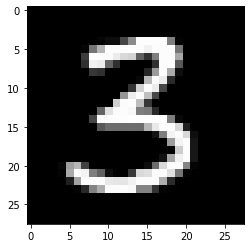

In [9]:
from utils.visual import display_image
display_image(img.numpy(), cmap='gray')

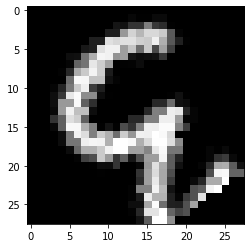

In [10]:
display_image(aug.numpy(), cmap='gray')

In [5]:
audio_dataset = audioMNIST(
    csv_path='./clients/train/0_audio.csv',
    augment_folder='/root/autodl-tmp/audio_mnist_augmented',
    num_view=2
)

In [6]:
wave, aug_wave, _ = audio_dataset[0]

In [8]:
aug_wave.shape

(1, 128, 32)

In [11]:
from reconstruct._utils.audio import save_logmel_as_wav
mean = -57
std = 17.8

def get_ready(t):
    t = (t * std) + mean
    return t[0]

save_logmel_as_wav(get_ready(wave), 'orig.wav')
save_logmel_as_wav(get_ready(aug_wave), 'aug.wav')


    